In [1]:
from ecell4 import *
import math
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
rng = GSLRandomNumberGenerator()

In [2]:
voxelr = 0.005
L = 2.
V=L**3
Da = 10.
Db = 0.
kD = 4*3.14*2*voxelr*Da
ka = 0.1*kD
kon = ka*kD/(ka+kD)
print 'kD,ka,kon',kD,ka,kon
dt = 2*voxelr*voxelr/3./Da
tb = (0.5*0.5*L*L)/6./Da #time to boundary
print 'dt',dt,tb,tb/dt
pacc = ka/6./(2**0.5)/Da/voxelr
P = 1. #must be less then one
alpha = P/pacc
print 'alpha',alpha
print 'pacc',pacc,dt*alpha
print 1./(1+kD/ka)

kD,ka,kon 1.256 0.1256 0.114181818182
dt 1.66666666667e-06 0.0166666666667 10000.0
alpha 3.37789863624
pacc 0.296042039057 5.6298310604e-06
0.0909090909091


In [3]:
def create_model_spa(Da,Db,voxelr,k): 
    with species_attributes():
        A | {'D': str(Da), 'radius':str(voxelr)}
        B | {'D': str(Db), 'radius':str(voxelr)}
        #C | {'D': str(Db), 'radius':str(voxelr)}        
    with reaction_rules():
        A + B > B | k
    return get_model()

In [7]:
#spatio
M =  L /(voxelr*2)
def spa_singlerun():
    model = create_model_spa(Da,Db,voxelr,ka)
    w = spatiocyte.SpatiocyteWorld(Real3(L,L,L),voxelr,rng)  
    #w = spatiocyte.create_spatiocyte_world_cell_list_impl(Real3(L,L,L),voxelr,Integer3(M,M,M),rng)    
    w.bind_to(model)
    (pidB,posB),suc = w.new_particle(Species("B"),Real3(L*0.5,L*0.5,L*0.5))
    coord = w.position2coordinate(posB.position())
    neipos = w.coordinate2position(w.get_neighbor(coord,1))
    (pidA,posA),suc = w.new_particle(Species("A"),neipos)
    sim = spatiocyte.SpatiocyteSimulator(w)
    #sim.set_alpha(alpha)
    sim.initialize()    
    duration = dt#1e-4
    bol = 0
    while sim.t() < duration:
        sim.step()
        cNa = w.num_molecules_exact(Species("A"))
        if (cNa == 0):
            return sim.t()  
        else:           
            pidA,posA = w.get_particle(pidA)
            inc = np.linalg.norm(np.array(tuple(posA.position()))-np.array(tuple(posB.position()))    )
            if (inc>0.5*L):
                #print 'escape'
                return 0
        
    return 0

In [ ]:
rebtime = []
norun = 100
#rng.seed(0)
for i in range(norun):
    #print 'i',i
    suc = spa_singlerun()
    if (suc!=0):
        rebtime.append(suc)

In [ ]:
rebtime=np.array(rebtime)
print float(len(rebtime))/norun
print min(rebtime)
print max(rebtime)
print float(len(rebtime[rebtime<dt]))/norun
#print 'mean',np.mean(rebtime),'1/kon',1./kon

sum of prob 0.0112666666667 88.7573964497


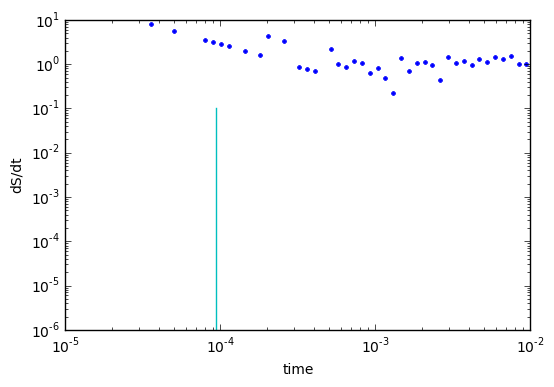

In [8]:
N = norun
#plt.plot(tt2,z(tt2),label='p ~ t^-0.5')
tmol = 1.66666666667e-06

binlist = np.logspace(math.log10(min(rebtime)),math.log10(max(rebtime)),50)
f, bins = np.histogram(rebtime, bins = binlist)
binwidth = bins[1:]-bins[:-1]    
ds = [float(h)/N/w for h,w in zip(f,binwidth)]
sump = np.sum(ds*binwidth)
print 'sum of prob',sump,1./sump
t = 0.5*(bins[1:]+bins[:-1])
plt.loglog(t,ds,'.')
y = lambda x: 1e-10*(x**(-3./2)) #t^(-3/2)
z = lambda x: 1e-4*(x**-0.5) #t^(-0.5)
tt = np.logspace(-5.5,-3.5,100)
tt2 = np.logspace(-8,-6,100)
#plt.plot(tt,y(tt),label='p ~ t^(-3/2)')
prange = np.logspace(-6,-1,10)
#plt.plot([tmol]*len(prange),prange,'r')
plt.plot([tb]*len(prange),prange,'c')
plt.ylabel('dS/dt')
plt.xlabel('time')
#plt.legend()

In [41]:
2* 0.0025* 0.0025/3./4

1.0416666666666667e-06

In [45]:
2* 0.0025* 0.0025/3./0.01

0.0004166666666666667